# Recommenders Assignments

## 1. Content-Based Filtering: Cosine Similarity

In [3]:
# 1. Read in the data from the first tab of the Movie Ratings spreadsheet, which contains genre labels
import pandas as pd
df = pd.read_excel('../Data/Movie_Ratings.xlsx')
df.head()

,Movie_ID,Movie_Title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [4]:
# 2. Remove the non-genre columns of the movie genre data
movie = df.set_index('Movie_Title').drop(columns='Movie_ID')
movie.index.name=None
movie.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
GoldenEye (1995),1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Get Shorty (1995),1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
Copycat (1995),0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [5]:
# 3. Calculate the cosine similarity of Toy Story (1995) and Get Shorty (1995)
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity(movie.loc[['Toy Story (1995)', 'Get Shorty (1995)']])[0][1]

0.3333333333333334

In [6]:
# 4. Calculate the cosine similarity of Toy Story (1995) compared with all the movies
cosine_similarity(movie)

array([[1.        , 0.        , 0.        , ..., 0.        , 0.57735027,
        0.        ],
       [0.        , 1.        , 0.57735027, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.57735027, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.70710678],
       [0.57735027, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.70710678, 0.        ,
        1.        ]])

In [7]:
# 5. Return the top 5 movies with the highest cosine similarity
cosine_df = pd.DataFrame(cosine_similarity(movie),index=movie.index,columns=movie.index).reset_index()

In [8]:
cosine_df.rename(columns={'index':'movie_title'},inplace=True)
cosine_df.head()

,movie_title,Toy Story (1995),GoldenEye (1995),Four Rooms (1995),Get Shorty (1995),Copycat (1995),Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),Twelve Monkeys (1995),Babe (1995),Dead Man Walking (1995),...,Mirage (1995),Mamma Roma (1962),"Sunchaser, The (1996)","War at Home, The (1996)",Sweet Nothing (1995),Mat' i syn (1997),B. Monkey (1998),Sliding Doors (1998),You So Crazy (1994),Scream of Stone (Schrei aus Stein) (1991)
0,Toy Story (1995),1.000000,0.000000,0.00000,0.333333,0.000000,0.00000,0.000000,0.666667,0.00000,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.57735,0.00000
1,GoldenEye (1995),0.000000,1.000000,0.57735,0.333333,0.333333,0.00000,0.000000,0.000000,0.00000,...,0.816497,0.00000,0.00000,0.00000,0.00000,0.00000,0.408248,0.000000,0.00000,0.00000
2,Four Rooms (1995),0.000000,0.577350,1.00000,0.000000,0.577350,0.00000,0.000000,0.000000,0.00000,...,0.707107,0.00000,0.00000,0.00000,0.00000,0.00000,0.707107,0.000000,0.00000,0.00000
3,Get Shorty (1995),0.333333,0.333333,0.00000,1.000000,0.333333,0.57735,0.408248,0.666667,0.57735,...,0.408248,0.57735,0.57735,0.57735,0.57735,0.57735,0.000000,0.408248,0.57735,0.57735
4,Copycat (1995),0.000000,0.333333,0.57735,0.333333,1.000000,0.57735,0.408248,0.333333,0.57735,...,0.408248,0.57735,0.57735,0.57735,0.57735,0.57735,0.408248,0.408248,0.00000,0.57735


In [9]:
cosine_df[['movie_title','Toy Story (1995)']]

,movie_title,Toy Story (1995)
0,Toy Story (1995),1.000000
1,GoldenEye (1995),0.000000
2,Four Rooms (1995),0.000000
3,Get Shorty (1995),0.333333
4,Copycat (1995),0.000000
...,...,...
1677,Mat' i syn (1997),0.000000
1678,B. Monkey (1998),0.000000
1679,Sliding Doors (1998),0.000000
1680,You So Crazy (1994),0.577350


In [10]:
cosine_df[['movie_title','Toy Story (1995)']].sort_values(by='Toy Story (1995)',ascending=False).head(6)

,movie_title,Toy Story (1995)
0,Toy Story (1995),1.000000
421,Aladdin and the King of Thieves (1996),1.000000
94,Aladdin (1992),0.866025
1218,"Goofy Movie, A (1995)",0.866025
242,Jungle2Jungle (1997),0.816497
622,Angels in the Outfield (1994),0.816497


## 2. User-Item Matrix

In [12]:
# 1. Read in the movies, users and ratings tabs of the spreadsheet into three DataFrames
user = pd.read_excel('../Data/Movie_Ratings.xlsx',sheet_name=1)
user.head()

,User_ID,Age,Gender,Occupation
0,1,24,M,technician
1,2,53,F,other
2,3,23,M,writer
3,4,24,M,technician
4,5,33,F,other


In [13]:
ratings = pd.read_excel('../Data/Movie_Ratings.xlsx',sheet_name=2)
ratings.head()

,User_ID,Movie_ID,Rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [14]:
ratings.describe()

,User_ID,Movie_ID,Rating
count,100000.00000,100000.000000,100000.000000
mean,462.48475,425.530130,3.529860
std,266.61442,330.798356,1.125674
min,1.00000,1.000000,1.000000
25%,254.00000,175.000000,3.000000
50%,447.00000,322.000000,4.000000
75%,682.00000,631.000000,4.000000
max,943.00000,1682.000000,5.000000


In [15]:
# 2. Use .pivot to restructure the ratings data into a user-item matrix
X = ratings.pivot(index='User_ID',columns='Movie_ID',values='Rating').fillna(3)
X.head()

Movie_ID,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
User_ID,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
5,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


## 3. TruncatedSVD

In [17]:
movie.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
GoldenEye (1995),1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Get Shorty (1995),1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
Copycat (1995),0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [18]:
# 1. Apply TruncatedSVD to the user-item matrix from the last assignment
from sklearn.decomposition import TruncatedSVD

In [19]:
# 2. View the user-item matrix and the shape of the user-item matrix
svd = TruncatedSVD(n_components =2)
svd.fit(X)

TruncatedSVD()

In [20]:
# 3. View the U matrix and the shape of the U matrix
u = svd.transform(X)

u_df = pd.DataFrame(u,index=X.index)
u_df.head()

,0,1
User_ID,,
1,127.325618,7.173015
2,124.145754,-2.173870
3,122.727835,-2.533006
4,123.802128,-2.822318
5,122.566026,0.754443


In [21]:
u_df.shape

(943, 2)

In [22]:
sigma = svd.singular_values_
sigma

array([3822.1590609 ,  100.21021731])

In [23]:
# 4. View the VT matrix and the shape of the VT matrix
vt = svd.components_

vd_df = pd.DataFrame(vt, columns=X.columns)
vd_df

Movie_ID,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
0,0.027515,0.024345,0.024133,0.025100,0.024327,0.024231,0.026796,0.025988,0.026408,0.024741,...,0.024100,0.024109,0.024100,0.024091,0.024100,0.024083,0.024100,0.024091,0.024100,0.024100
1,0.068073,0.008369,-0.007014,0.051881,-0.004403,-0.009122,0.061826,0.073482,0.052809,0.007767,...,-0.010383,-0.009653,-0.010383,-0.010600,-0.010383,-0.009783,-0.010383,-0.010083,-0.010383,-0.010383


In [107]:
svd.explained_variance_ratio_

array([0.02634224, 0.07036522])

## 4. Choosing the Number of Components

In [25]:
# 1. Fit a TruncatedSVD model with 500 components
svd_5 = TruncatedSVD(n_components = 500)
svd_5.fit(X)

TruncatedSVD(n_components=500)

In [26]:
u_5 = svd_5.transform(X)
udf_5 = pd.DataFrame(u_5,index=X.index)
udf_5.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
User_ID,,,,,,,,,,,,,,,,,,,,,
1,127.325618,7.173031,0.907461,5.231709,-2.167019,-1.874486,-4.432229,2.894944,2.266183,0.029382,...,0.125533,-0.079591,0.019154,0.127536,0.077508,0.114526,0.037928,-0.131768,0.176933,-0.178515
2,124.145754,-2.173872,0.531446,0.834728,2.276656,-0.611334,-0.515801,2.473437,1.182575,-0.290647,...,-0.288800,-0.104102,-0.103648,0.118848,-0.371668,-0.154231,0.183563,-0.185956,-0.222777,0.206548
3,122.727835,-2.533028,0.567466,-0.600540,-0.735368,0.202150,-0.220568,-1.349227,0.322606,-0.567155,...,-0.222596,0.364485,0.182792,-0.257749,-0.101674,0.281762,-0.340415,-0.081799,0.314323,-0.207666
4,123.802128,-2.822308,-0.533045,0.232890,-0.125395,0.595281,-0.011407,0.062385,-0.514061,0.398184,...,-0.173680,0.102989,0.500713,0.094362,-0.131852,-0.118840,-0.177720,-0.133955,0.091489,-0.260386
5,122.566026,0.754483,0.591899,1.772757,-4.253326,1.408859,-3.002253,2.684717,0.209389,1.068306,...,0.087215,0.140979,0.003853,0.132655,0.108157,0.059338,0.136675,-0.031197,0.029036,0.079891


In [27]:
svd_5.explained_variance_ratio_

array([0.02634224, 0.07036522, 0.03681567, 0.02063823, 0.01649736,
       0.01409417, 0.01302634, 0.0112224 , 0.01050965, 0.00932336,
       0.00891829, 0.00853822, 0.00809597, 0.00769388, 0.00730685,
       0.00696206, 0.00674479, 0.00644786, 0.00632237, 0.00612172,
       0.00603339, 0.00597731, 0.00577663, 0.00564995, 0.0055352 ,
       0.0054283 , 0.00527242, 0.00521799, 0.00517851, 0.00505053,
       0.00497805, 0.00486856, 0.00484103, 0.00474974, 0.00471401,
       0.00465376, 0.00453524, 0.00451875, 0.00445842, 0.00437995,
       0.00431697, 0.00429781, 0.00424678, 0.00418772, 0.00411998,
       0.00409545, 0.00404613, 0.00403745, 0.00396043, 0.00393868,
       0.00390961, 0.00385175, 0.00380178, 0.00377023, 0.00374255,
       0.0036983 , 0.00368315, 0.003676  , 0.00363946, 0.00359394,
       0.00354711, 0.00348496, 0.00347789, 0.00344826, 0.00340792,
       0.00336687, 0.00334061, 0.00331156, 0.00330418, 0.00328733,
       0.00325243, 0.00324535, 0.00319532, 0.00316577, 0.00315

In [28]:
sum(svd_5.explained_variance_ratio_)

0.9739975578636945

In [29]:
udf_5.shape

(943, 500)

In [30]:
import numpy as np

In [31]:
cum_evr = list(zip(range(1,udf_5.shape[1]+1),np.cumsum(svd_5.explained_variance_ratio_)))
cum_evr

[(1, 0.026342243723369962),
 (2, 0.09670746059197204),
 (3, 0.1335231326797079),
 (4, 0.15416135834298778),
 (5, 0.17065872214204308),
 (6, 0.18475289185595273),
 (7, 0.19777923632260516),
 (8, 0.20900163758765153),
 (9, 0.21951128949317403),
 (10, 0.22883464805499745),
 (11, 0.23775293399909797),
 (12, 0.24629115603506985),
 (13, 0.2543871303945472),
 (14, 0.26208101216967594),
 (15, 0.2693878605688264),
 (16, 0.27634992471945913),
 (17, 0.2830947136284877),
 (18, 0.2895425728016855),
 (19, 0.29586494233301347),
 (20, 0.3019866643757125),
 (21, 0.30802005306536284),
 (22, 0.3139973586073405),
 (23, 0.3197739860970719),
 (24, 0.3254239327157055),
 (25, 0.3309591350479494),
 (26, 0.3363874381610179),
 (27, 0.3416598544719041),
 (28, 0.34687784267696425),
 (29, 0.35205634931131635),
 (30, 0.3571068834606964),
 (31, 0.36208493152279514),
 (32, 0.36695349298760566),
 (33, 0.37179452298682525),
 (34, 0.3765442619193429),
 (35, 0.3812582748940551),
 (36, 0.38591203271865215),
 (37, 0.3904472

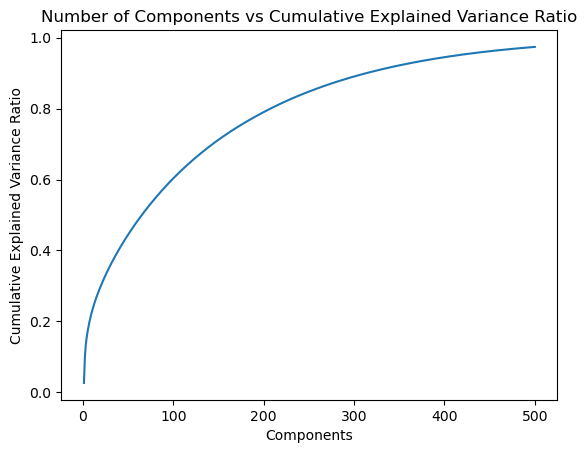

In [32]:
# 2. Plot the cumulative explained variance ratios
cum_evr_df = pd.DataFrame(cum_evr).set_index(0)
cum_evr_df.plot(title='Number of Components vs Cumulative Explained Variance Ratio',
                xlabel='Components',
                ylabel='Cumulative Explained Variance Ratio',
                legend=False);

In [33]:
# 3. Suggest a “good” number of components that best captures the info in the data set
# 250 components roughtly 85%

In [34]:
# 4. Fit another TruncatedSVD model with the “good” number of components


In [35]:
# 1. Fit a TruncatedSVD model with 250 components
svd_250 = TruncatedSVD(n_components = 250)
svd_250.fit(X)

TruncatedSVD(n_components=250)

In [36]:
u_250 = svd_250.transform(X)
udf_250 = pd.DataFrame(u_250,index=X.index)
udf_250.head()

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
User_ID,,,,,,,,,,,,,,,,,,,,,
1,127.325618,7.173031,0.907461,5.231709,-2.167019,-1.874485,-4.432229,2.894945,2.266183,0.029383,...,0.084372,-0.122178,0.054877,0.863108,-0.322264,0.280189,-0.381958,0.309130,0.212761,-0.123272
2,124.145754,-2.173872,0.531446,0.834728,2.276656,-0.611334,-0.515801,2.473437,1.182575,-0.290648,...,0.114455,0.330478,0.385569,-0.195772,0.170797,0.255205,0.224301,0.879605,-0.090058,0.046380
3,122.727835,-2.533028,0.567466,-0.600540,-0.735368,0.202150,-0.220568,-1.349227,0.322606,-0.567155,...,-0.492009,-0.339895,0.120201,0.077475,-0.538059,0.345823,0.276277,0.140559,0.160497,-0.005140
4,123.802128,-2.822308,-0.533045,0.232890,-0.125395,0.595281,-0.011407,0.062385,-0.514061,0.398185,...,-0.115530,-0.342162,-0.162724,-0.270405,0.372276,0.258001,-0.241730,-0.178798,-0.061279,-0.075601
5,122.566026,0.754483,0.591899,1.772757,-4.253326,1.408859,-3.002253,2.684717,0.209389,1.068305,...,-0.523755,0.137224,0.345903,0.298652,-0.628357,0.383624,-0.021643,0.031241,0.107179,-0.501146


In [37]:
svd_250.explained_variance_ratio_

array([0.02634224, 0.07036522, 0.03681567, 0.02063823, 0.01649736,
       0.01409417, 0.01302634, 0.0112224 , 0.01050965, 0.00932336,
       0.00891829, 0.00853822, 0.00809597, 0.00769388, 0.00730685,
       0.00696206, 0.00674479, 0.00644786, 0.00632237, 0.00612172,
       0.00603339, 0.00597731, 0.00577663, 0.00564995, 0.0055352 ,
       0.0054283 , 0.00527242, 0.00521799, 0.00517851, 0.00505053,
       0.00497805, 0.00486856, 0.00484103, 0.00474974, 0.00471401,
       0.00465376, 0.00453524, 0.00451875, 0.00445842, 0.00437995,
       0.00431697, 0.00429781, 0.00424678, 0.00418772, 0.00411998,
       0.00409545, 0.00404613, 0.00403744, 0.00396043, 0.00393868,
       0.00390961, 0.00385175, 0.00380178, 0.00377023, 0.00374255,
       0.00369829, 0.00368315, 0.003676  , 0.00363946, 0.00359394,
       0.00354711, 0.00348496, 0.00347789, 0.00344826, 0.00340791,
       0.00336686, 0.0033406 , 0.00331155, 0.00330418, 0.00328733,
       0.00325243, 0.00324535, 0.00319532, 0.00316577, 0.00315

In [38]:
sum(svd_250.explained_variance_ratio_)

0.846760103907672

In [39]:
udf_250.shape

(943, 250)

## 5. Making Collaborative Filtering Recommendations

In [41]:
# 1. View the new user vector
import pandas as pd
import numpy as np

# read in the movies tab of the spreadsheet
movies = pd.read_excel('../Data/Movie_Ratings.xlsx')

# read in the ratings tab
ratings = pd.read_excel('../Data/Movie_Ratings.xlsx', sheet_name=2)

# use .pivot to restructure the ratings data into a user-item matrix
X = (ratings.pivot(index='User_ID', columns='Movie_ID', values='Rating').fillna(3))

# create a vector of NaN values
vector_length = X.shape[1]
new_user = np.full(vector_length, np.NaN)

# populate with 5 ratings
ratings = [5, 3, 5, 5, 4]
positions_to_populate = [11, 14, 28, 63, 66]
new_user[positions_to_populate] = ratings

# view as a DataFrame
new_user_df = pd.DataFrame([new_user], columns=movies.Movie_Title)
new_user_df

Movie_Title,Toy Story (1995),GoldenEye (1995),Four Rooms (1995),Get Shorty (1995),Copycat (1995),Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),Twelve Monkeys (1995),Babe (1995),Dead Man Walking (1995),Richard III (1995),...,Mirage (1995),Mamma Roma (1962),"Sunchaser, The (1996)","War at Home, The (1996)",Sweet Nothing (1995),Mat' i syn (1997),B. Monkey (1998),Sliding Doors (1998),You So Crazy (1994),Scream of Stone (Schrei aus Stein) (1991)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# view only the movies that the new user rated
new_user_df.T.dropna()

,0
Movie_Title,
"Usual Suspects, The (1995)",5.0
Mr. Holland's Opus (1995),3.0
Batman Forever (1995),5.0
"Shawshank Redemption, The (1994)",5.0
Ace Ventura: Pet Detective (1994),4.0


In [50]:
# 2. Transform the user into the latent space using .transform()
new_user = svd_250.transform(new_user_df.fillna(3))
new_user

array([[ 1.23173718e+02, -2.50283200e+00,  1.16245959e-01,
        -1.52219133e-01, -2.28008896e-01,  2.09176592e-01,
         3.09190145e-01, -1.10998898e+00,  1.24584992e-01,
        -2.53701429e-01,  5.40921918e-01, -5.48267950e-01,
         2.15923042e-01, -3.20553680e-01, -1.26073810e-01,
         5.16418844e-02,  6.23204363e-01, -2.40287497e-01,
        -1.66070065e-01, -4.51940464e-02,  2.03795129e-02,
        -1.65673796e-01,  7.29252633e-02,  4.58722497e-01,
        -2.38015040e-01,  5.48513966e-01, -1.99279022e-01,
        -2.78861780e-01,  1.11455276e-01, -2.87015893e-01,
        -1.63821425e-01,  2.54761073e-01, -1.42686036e-01,
         1.27544676e-01,  1.14876864e-01,  3.02712291e-01,
         4.36786363e-02,  8.67226303e-02, -4.05123512e-01,
        -2.84933001e-01,  1.45371686e-01,  7.45064659e-02,
         3.92054863e-01,  2.73571573e-02, -4.07821009e-01,
        -9.90765264e-02, -4.30538293e-01, -3.78178573e-01,
         3.88741314e-04, -7.32377518e-02,  4.06385918e-0

In [52]:
# 3. Reconstruct the user-item matrix for the user using np.dot()
new_user.shape

(1, 250)

In [56]:
svd_250.components_.shape


(250, 1682)

In [64]:
# 4. Make 10 movie recommendations for the user
new_user_recs = np.dot(new_user, svd_250.components_)
new_user_recs

array([[3.01557718, 3.10323894, 3.0809671 , ..., 3.00788645, 3.00495455,
        3.00495455]])

In [66]:
# 5. Review the movies and determine if they make sense
recs = pd.DataFrame(new_user_recs, columns=new_user_df.columns)
recs

Movie_Title,Toy Story (1995),GoldenEye (1995),Four Rooms (1995),Get Shorty (1995),Copycat (1995),Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),Twelve Monkeys (1995),Babe (1995),Dead Man Walking (1995),Richard III (1995),...,Mirage (1995),Mamma Roma (1962),"Sunchaser, The (1996)","War at Home, The (1996)",Sweet Nothing (1995),Mat' i syn (1997),B. Monkey (1998),Sliding Doors (1998),You So Crazy (1994),Scream of Stone (Schrei aus Stein) (1991)
0,3.015577,3.103239,3.080967,2.94428,3.004661,3.014325,3.045164,3.026051,3.048699,3.158701,...,3.004955,3.0033,3.004955,3.001866,3.004955,3.010818,3.004955,3.007886,3.004955,3.004955


In [100]:
# 6. Optional: Try playing around with the number of components to see the difference in movie recommendations
top_rec = recs.T.sort_values(by=0,ascending=False).head(14)

In [96]:
already_rated = new_user_df.T.dropna().index
already_rated

Index(['Usual Suspects, The (1995)', 'Mr. Holland's Opus (1995)',
       'Batman Forever (1995)', 'Shawshank Redemption, The (1994)',
       'Ace Ventura: Pet Detective (1994)'],
      dtype='object', name='Movie_Title')

In [102]:
top_rec[~top_rec.index.isin(already_rated)]

,0
Movie_Title,
Grease (1978),3.182509
Reservoir Dogs (1992),3.171924
Seven (Se7en) (1995),3.167581
Billy Madison (1995),3.166087
Tommy Boy (1995),3.161576
Richard III (1995),3.158701
Schindler's List (1993),3.155201
Happy Gilmore (1996),3.153168
"Great Escape, The (1963)",3.151314
